In [1]:
%pylab inline
import matplotlib.pyplot as plt
import gala
import gala.potential as gp
import gala.dynamics as gd
import bfe
from scipy.spatial.transform import Rotation as Rot


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
plt.style.use('~/matplotlib.mplstyle')

In [3]:
def sample_hern(size=1):
    mu = np.random.random(size=size)
    return mu**0.5 / (1-mu**0.5)

def spherical_hern(a, b, c, theta_rot, size=1):
    phi = np.random.uniform(0, 2*np.pi, size=size)
    theta = np.arccos(2*np.random.random(size=size) - 1)
    r = sample_hern(size)
    
    xyz = np.zeros((size, 3))
    xyz[:,0] = r * np.cos(phi) * np.sin(theta) / a
    xyz[:,1] = r * np.sin(phi) * np.sin(theta) / b
    xyz[:,2] = r * np.cos(theta) / c
    
    rot = Rot.from_euler('z', theta_rot, degrees=True)
    rot_xyz = rot.apply(xyz)
    #xa = rot_xyz[0]
    #yb = rot_xyz[1]
    #zc = rot_xyz[2]
    
    return rot_xyz

In [4]:
xyz_hern = spherical_hern(1, 0.5, 0.5, 45, 1000)

(-5.0, 5.0)

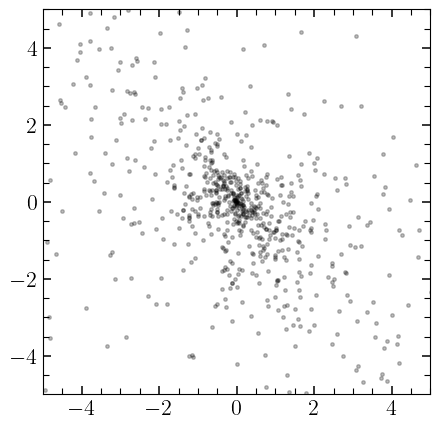

In [133]:
plt.figure(figsize=(5,5))
plt.scatter(xyz_hern[:,0], xyz_hern[:,1], color='k', alpha=0.25, marker='.')
plt.xlim(-5, 5)
plt.ylim(-5, 5)

In [ ]:
def flttened_hernquist_sample(x, y, z, M, a, b, c, rs, theta):
    ## implement rotation
    xyz = np.array([x/a, y/b, z/c])
    rot = Rot.from_euler('x', theta, degrees=True)
    rot_xyz = rot.apply(xyz)
    xa = rot_xyz[0]
    yb = rot_xyz[1]
    zc = rot_xyz[2]
    #s = np.sqrt((x/a)**2 + (y/b)**2 + (z/c)**2)
    s = np.sqrt((xa)**2 + (yb)**2 + (zc)**2)
    return hernquist_density(s, M, rs)

In [52]:
def hernquist_density(r, M, a):
    return M*a / (2*np.pi) / (r*(r+a)**3)

def flattened_hernquist_density(x, y, z, M, a, b, c, rs, theta):
    ## implement rotation
    xyz = np.array([x/a, y/b, z/c])
    rot = Rot.from_euler('x', theta, degrees=True)
    rot_xyz = rot.apply(xyz)
    xa = rot_xyz[0]
    yb = rot_xyz[1]
    zc = rot_xyz[2]
    #s = np.sqrt((x/a)**2 + (y/b)**2 + (z/c)**2)
    s = np.sqrt((xa)**2 + (yb)**2 + (zc)**2)
    return hernquist_density(s, M, rs)

In [36]:
#def built_triaxial_halo(T)

In [5]:
# a>b>c

In [ ]:
#s = c/a # minor to major axis
#q = b/a # interm. to major axis#

In [100]:
def compute_triax_halo_coeff(size, a, b, c, theta, nmax=10, lmax=10):
    xyz_hern = spherical_hern(a, b, c, theta, size)
    print('Done generating halo')
    Snlm_hern, Tnlm_hern = gp.scf.compute_coeffs_discrete(xyz_hern, 
                                                          mass=np.ones(len(xyz_hern))/len(xyz_hern), 
                                                          nmax=nmax, lmax=lmax, r_s=1)
    print('Done computing coefficients')
    halo_coefs = bfe.coefficients.Coeff_properties(Snlm_hern, Tnlm_hern, nmax=nmax+1, lmax=lmax+1)
    U = halo_coefs.U_all()
    return -U, [Snlm_hern, Tnlm_hern]

Done generating halo
Done computing coefficients


In [114]:
def make_shape_coeff_plot(pot, U , title):
    grid = np.linspace(-6, 6, 128)

    fig, axes = plt.subplots(1, 3, figsize=(16, 5))
    _ = pot.plot_contours((grid, grid, 0), ax=axes[0])
    axes[0].set_xlabel('$x$')
    axes[0].set_ylabel('$y$')

    _ = pot.plot_contours((grid, 0, grid), ax=axes[1])
    axes[1].set_xlabel('$x$')
    axes[1].set_ylabel('$z$')

    im = axes[2].imshow(np.log10(np.sum(U[:,:,:], axis=0)).T, origin='lower', vmin=-0.5, vmax=-4, cmap='Blues')
    fig = plt.colorbar(im, ax=axes[2])
    axes[2].set_xlabel('$l$')
    axes[2].set_ylabel('$m$')
    plt.suptitle(title, fontsize=17)
    
    return fig


Done generating halo
Done computing coefficients


/tmp/ipykernel_707915/2011851866.py:13: RuntimeWarning: divide by zero encountered in log10
  im = axes[2].imshow(np.log10(np.sum(U[:,:,:], axis=0)).T, origin='lower', vmin=-0.5, vmax=-4)


Done generating halo
Done computing coefficients
Done generating halo
Done computing coefficients
Done generating halo
Done computing coefficients


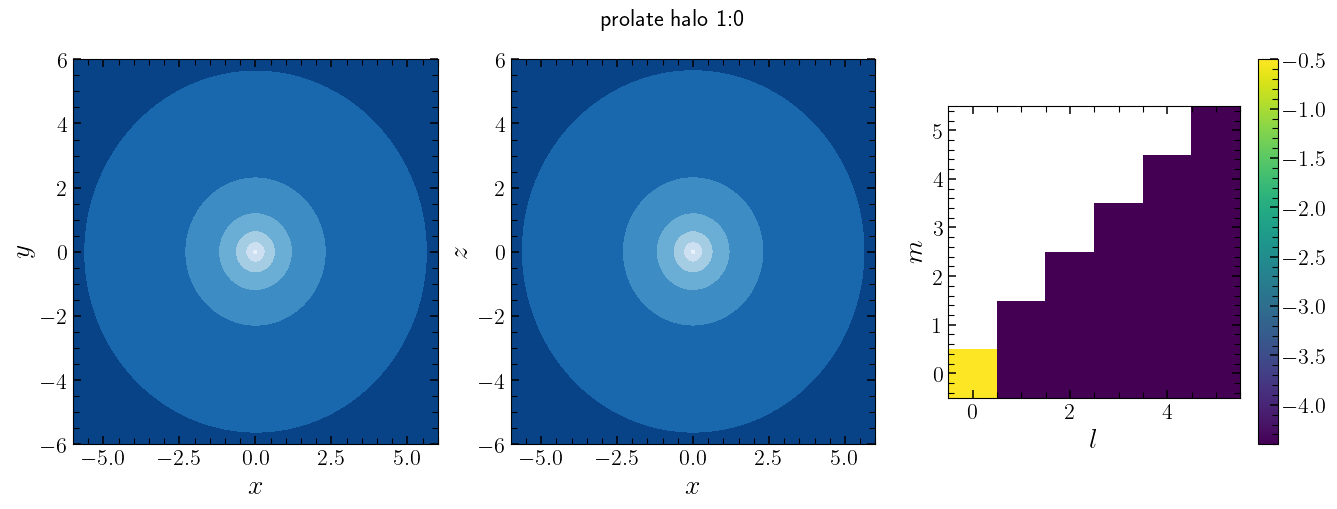

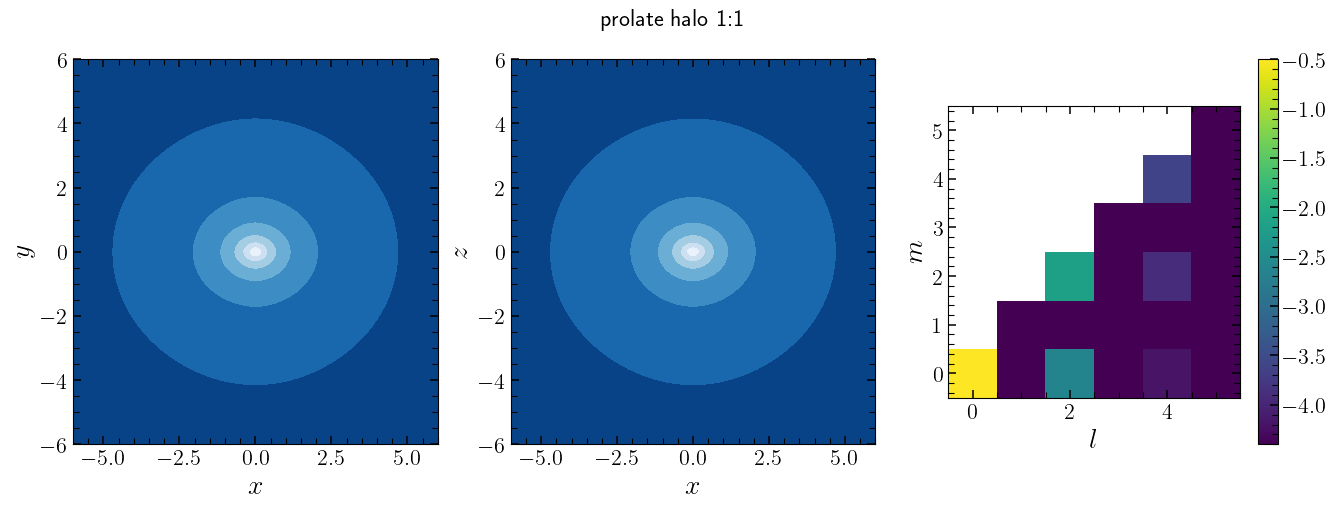

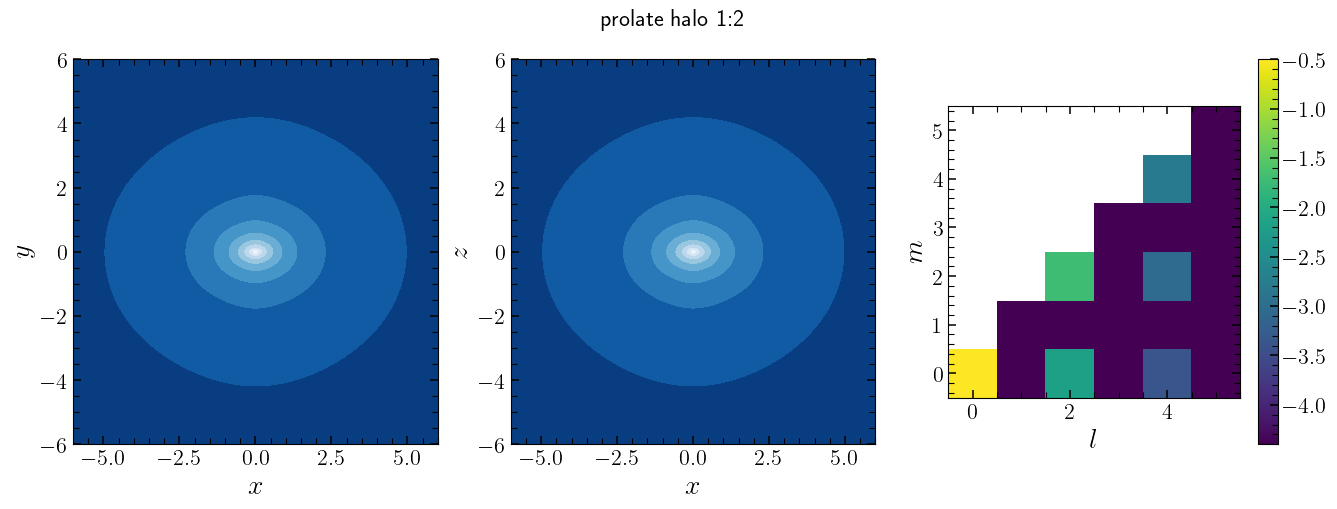

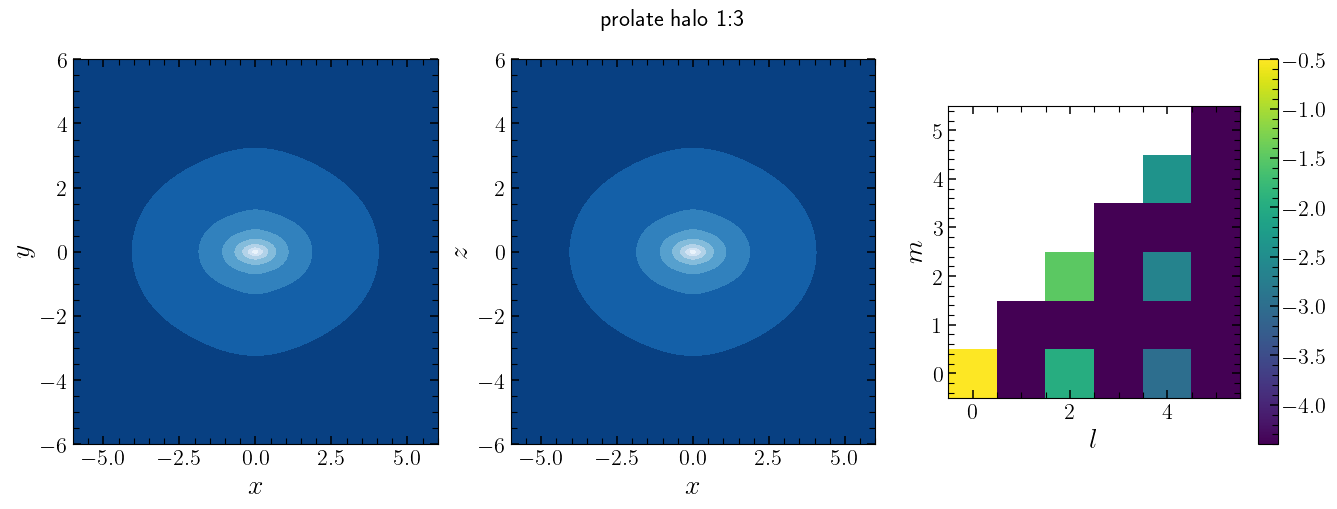

In [124]:
npart = 100000
a = 1
b = 2
c = 2
theta=0
ar = np.linspace(1, 4, 4)
for q in range(len(ar)):
    U_prol, coeff_halo = compute_triax_halo_coeff(npart, a, ar[q], ar[q], theta, nmax=10, lmax=5)
    halo_pot = gp.scf.SCFPotential(1, 1, coeff_halo[0], coeff_halo[1])
    make_shape_coeff_plot(halo_pot, U_prol, r'prolate halo 1:{}'.format(ar[q]))

Done generating halo
Done computing coefficients


/tmp/ipykernel_707915/2011851866.py:13: RuntimeWarning: divide by zero encountered in log10
  im = axes[2].imshow(np.log10(np.sum(U[:,:,:], axis=0)).T, origin='lower', vmin=-0.5, vmax=-4)


Done generating halo
Done computing coefficients
Done generating halo
Done computing coefficients
Done generating halo
Done computing coefficients


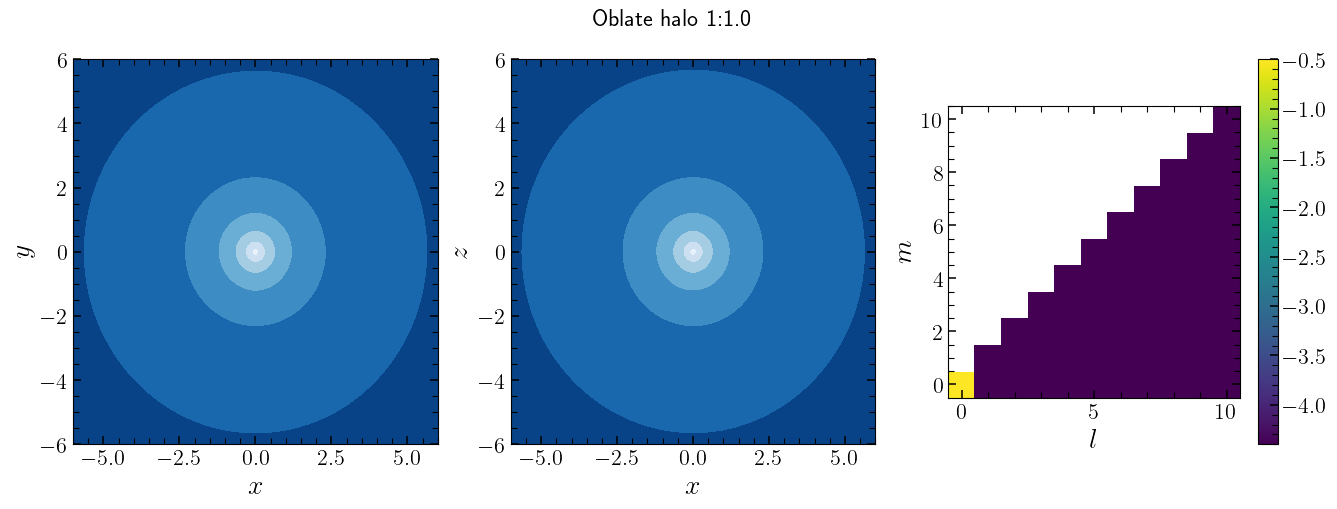

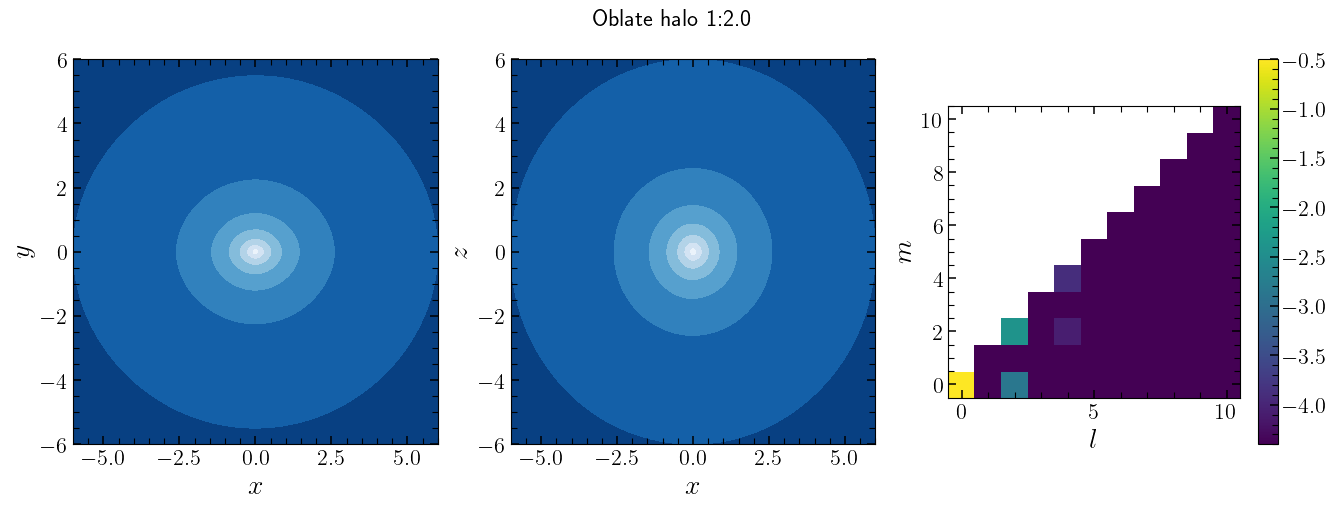

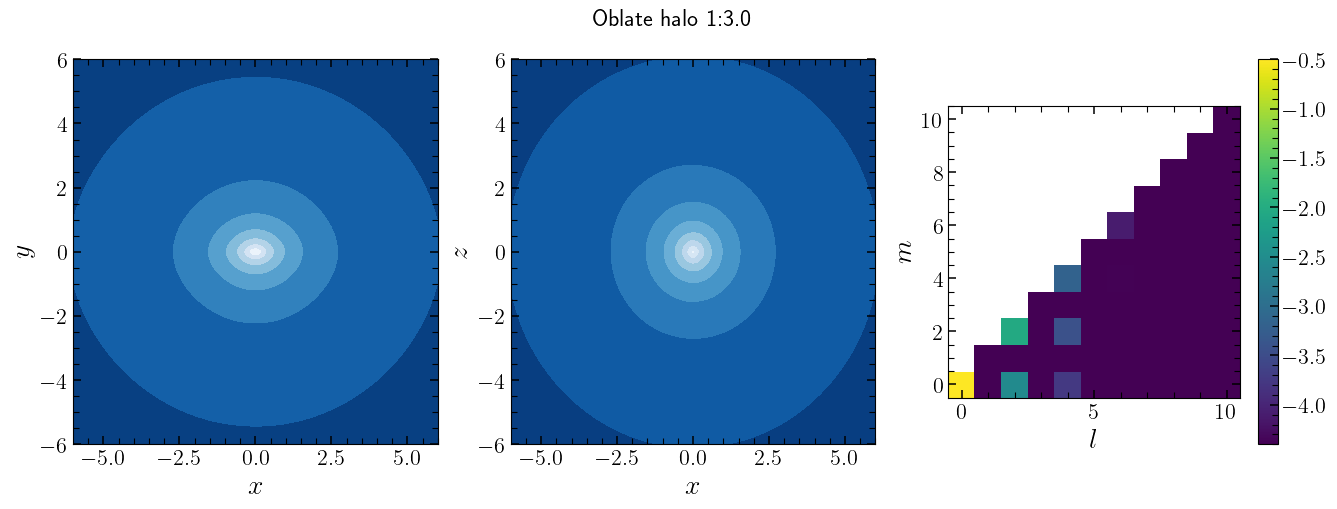

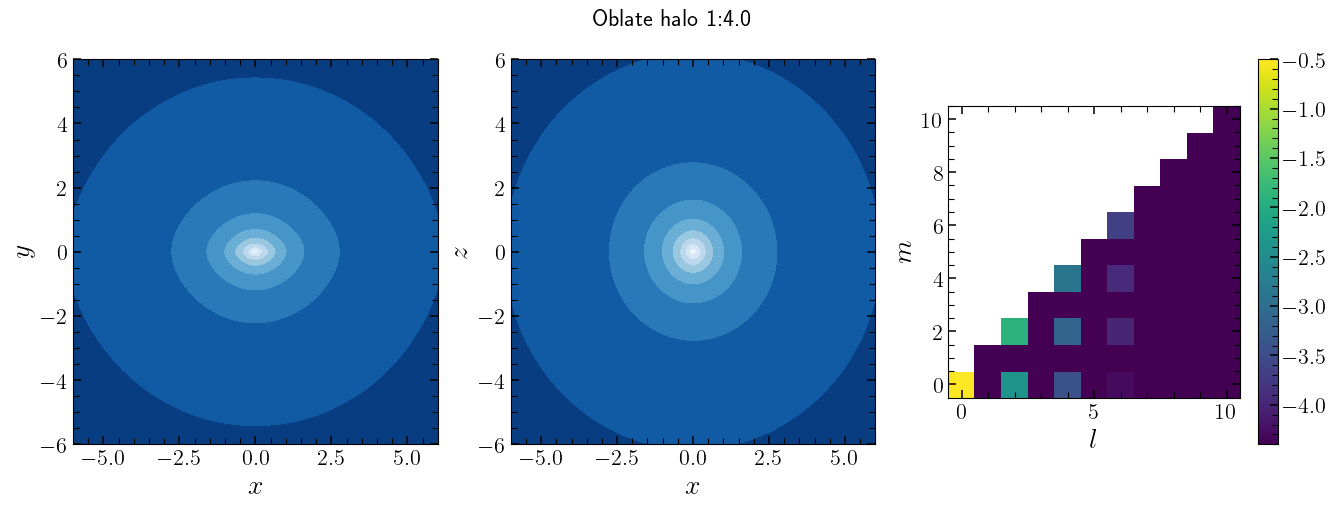

In [134]:
npart = 100000
a = 1
b = 1
c = 2
theta=0
ar = np.linspace(1, 4, 4)
for q in range(len(ar)):
    U_obl, coeff_halo = compute_triax_halo_coeff(npart, a, ar[q], b, theta=0, nmax=10, lmax=10)
    halo_pot = gp.scf.SCFPotential(1, 1, coeff_halo[0], coeff_halo[1])
    make_shape_coeff_plot(halo_pot, U_obl, r'Oblate halo 1:{}'.format(ar[q]))

Done generating halo
Done computing coefficients


/tmp/ipykernel_707915/2011851866.py:13: RuntimeWarning: divide by zero encountered in log10
  im = axes[2].imshow(np.log10(np.sum(U[:,:,:], axis=0)).T, origin='lower', vmin=-0.5, vmax=-4)


Done generating halo
Done computing coefficients
Done generating halo
Done computing coefficients
Done generating halo
Done computing coefficients


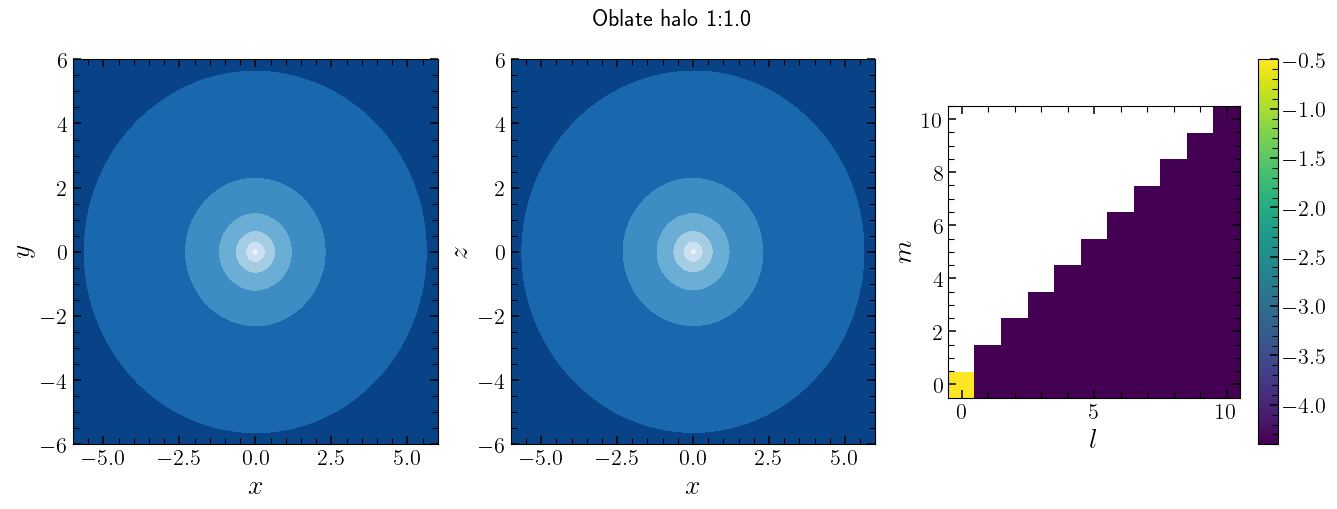

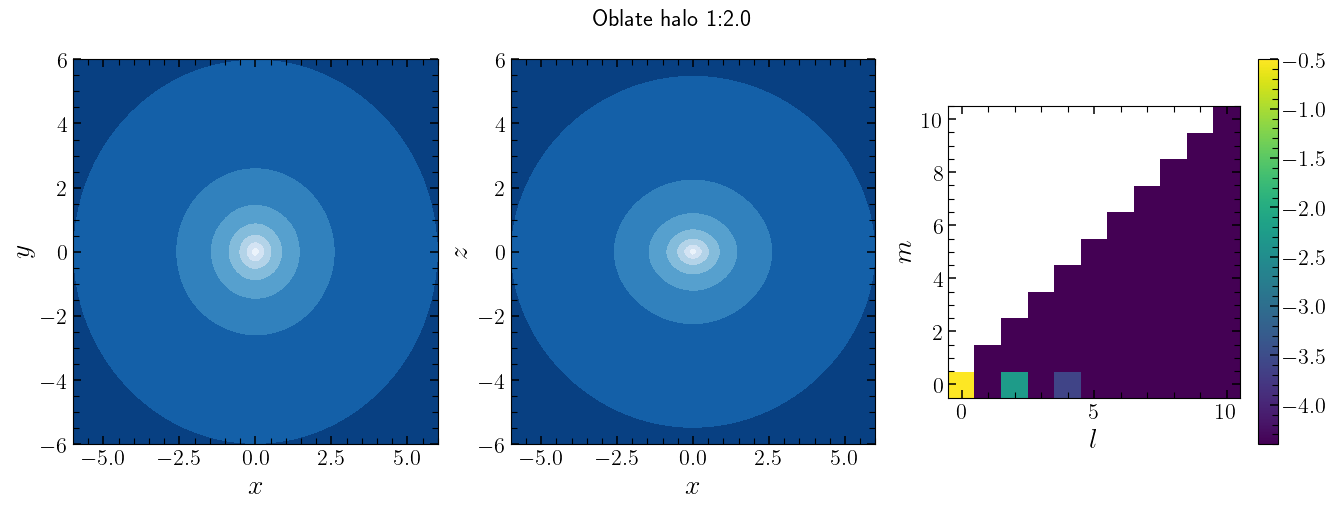

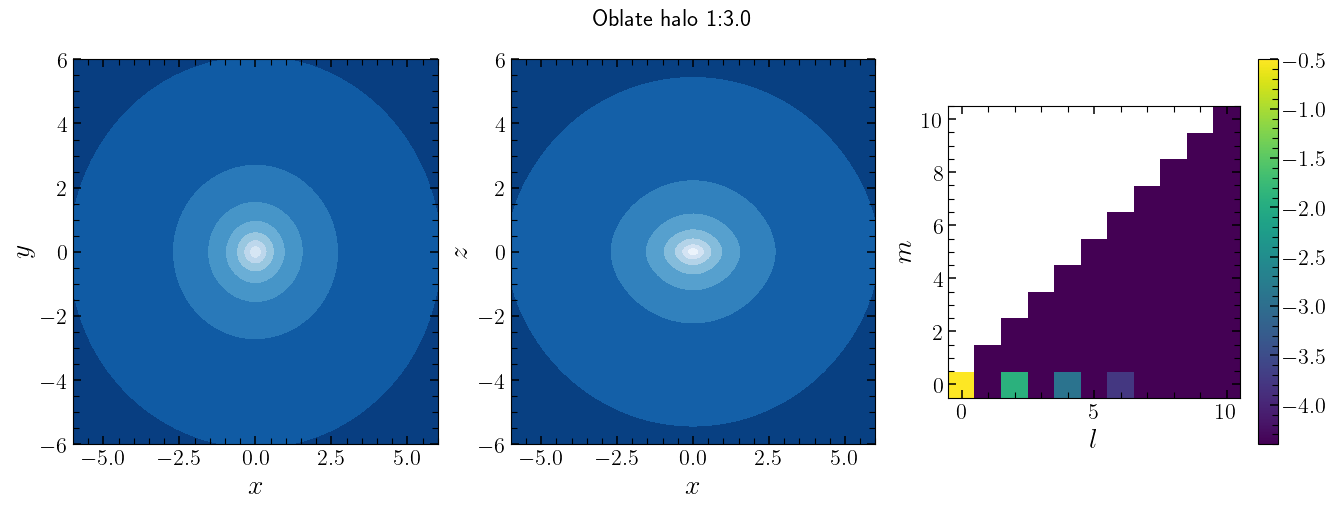

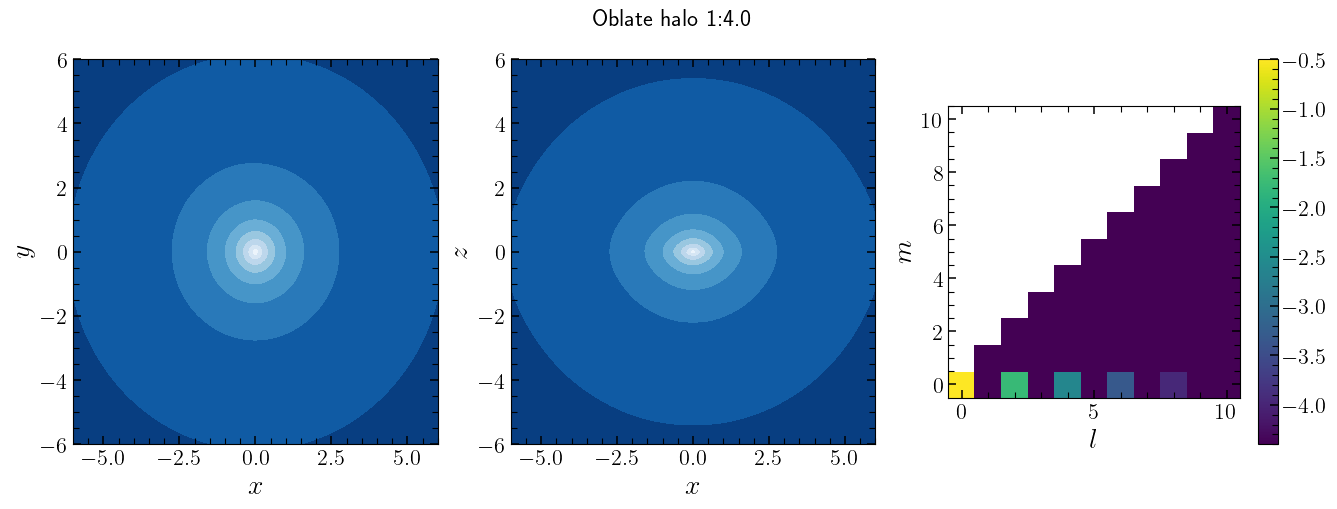

In [135]:
npart = 100000
a = 1
b = 1
c = 2
theta=0
ar = np.linspace(1, 4, 4)
for q in range(len(ar)):
    U_obl, coeff_halo = compute_triax_halo_coeff(npart, a, b, ar[q], theta=0, nmax=10, lmax=10)
    halo_pot = gp.scf.SCFPotential(1, 1, coeff_halo[0], coeff_halo[1])
    make_shape_coeff_plot(halo_pot, U_obl, r'Oblate halo 1:{}'.format(ar[q]))

Done generating halo
Done computing coefficients


/tmp/ipykernel_707915/2011851866.py:13: RuntimeWarning: divide by zero encountered in log10
  im = axes[2].imshow(np.log10(np.sum(U[:,:,:], axis=0)).T, origin='lower', vmin=-0.5, vmax=-4)


Done generating halo
Done computing coefficients
Done generating halo
Done computing coefficients
Done generating halo
Done computing coefficients


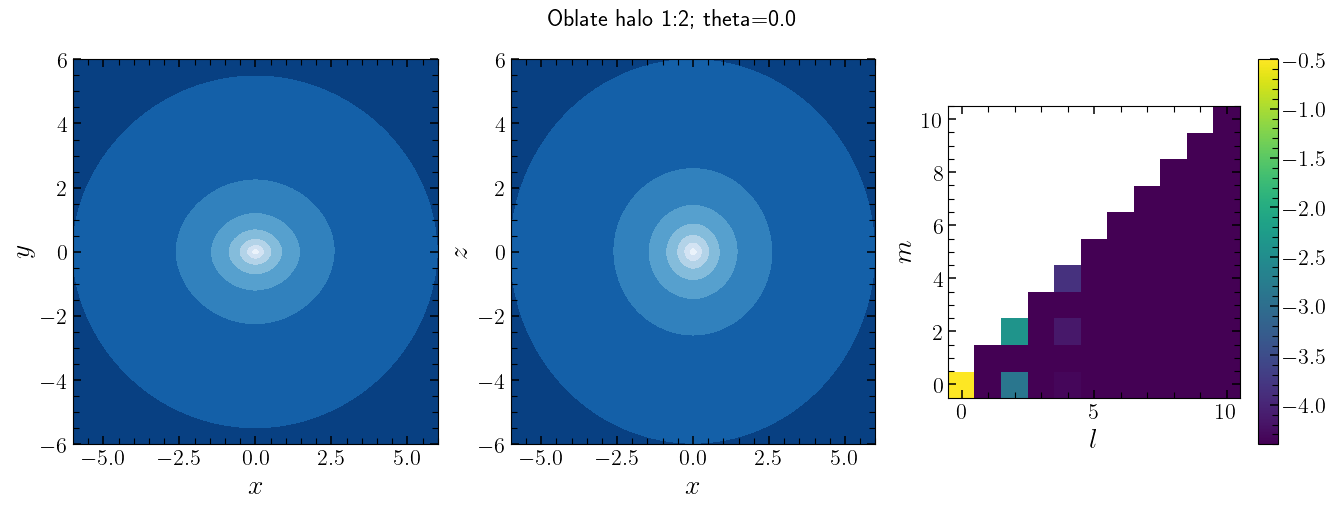

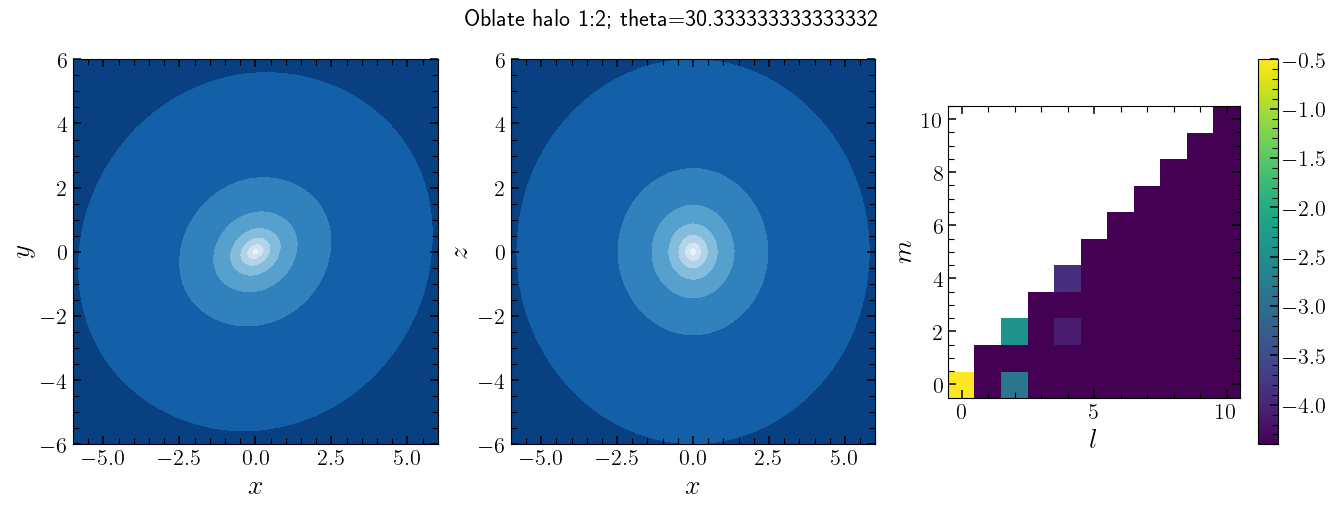

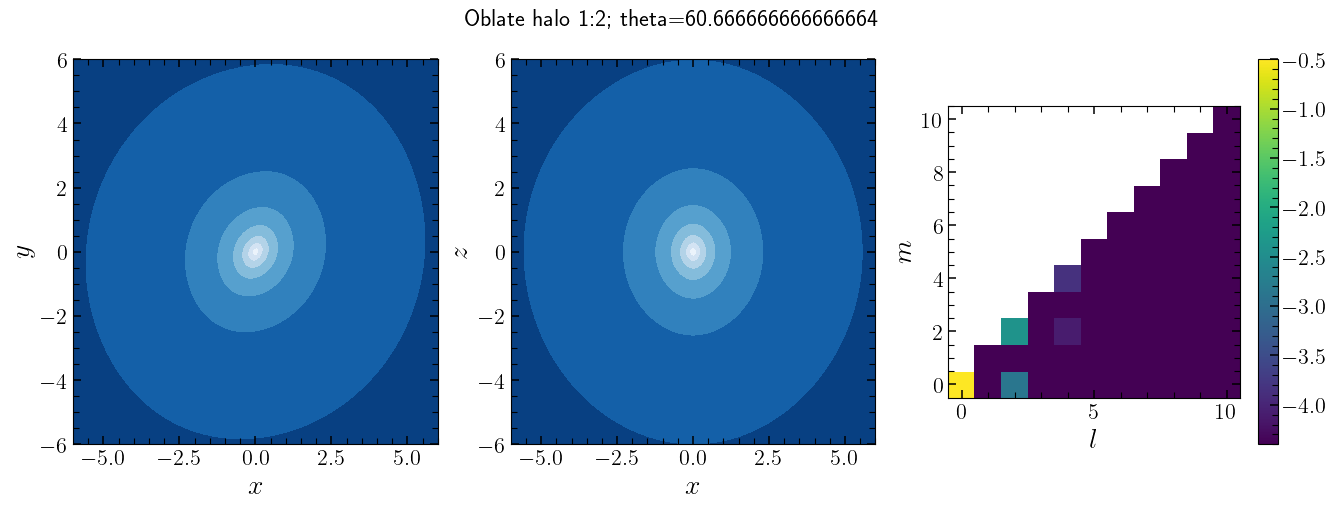

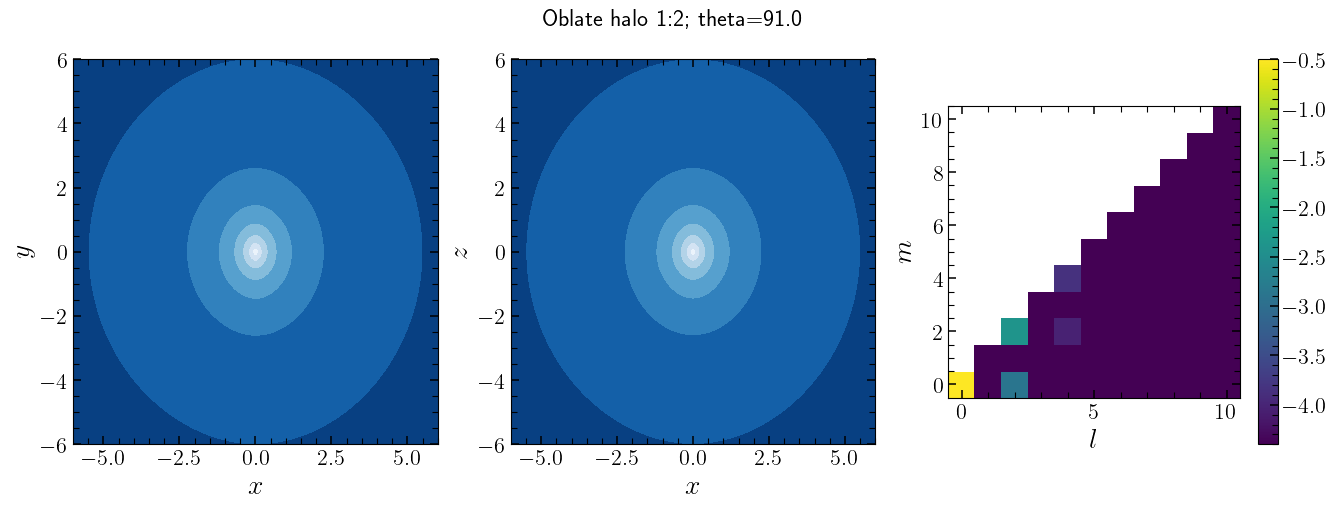

In [136]:
npart = 100000
a = 1
b = 1
c = 2
theta= np.linspace(0, 91, 4)
for t in range(len(theta)):
    U_obl, coeff_halo = compute_triax_halo_coeff(npart, a, 2, b, theta=theta[t], nmax=10, lmax=10)
    halo_pot = gp.scf.SCFPotential(1, 1, coeff_halo[0], coeff_halo[1])
    make_shape_coeff_plot(halo_pot, U_obl, r'Oblate halo 1:2; theta={:.1f}'.format(theta[t]))

Done generating halo
Done computing coefficients


/tmp/ipykernel_707915/2011851866.py:13: RuntimeWarning: divide by zero encountered in log10
  im = axes[2].imshow(np.log10(np.sum(U[:,:,:], axis=0)).T, origin='lower', vmin=-0.5, vmax=-4)


Done generating halo
Done computing coefficients
Done generating halo
Done computing coefficients
Done generating halo
Done computing coefficients


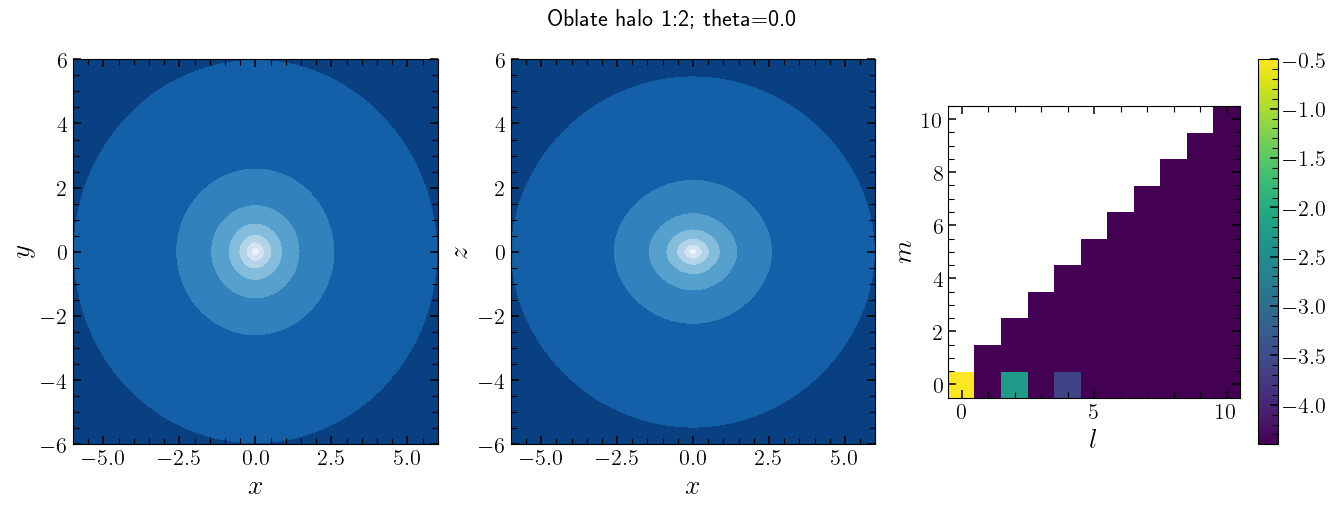

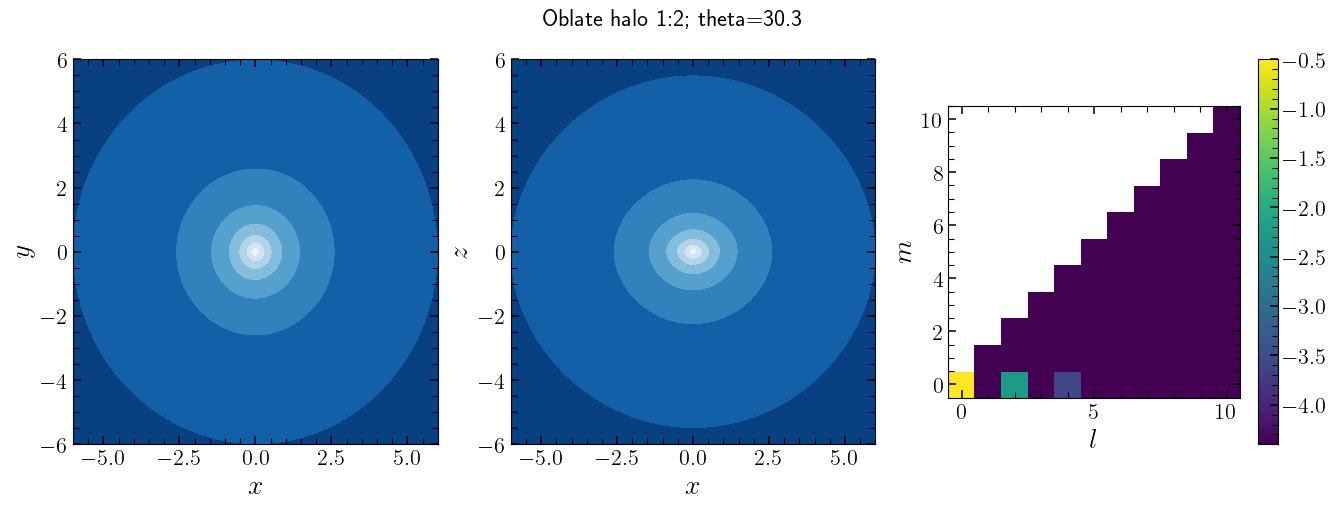

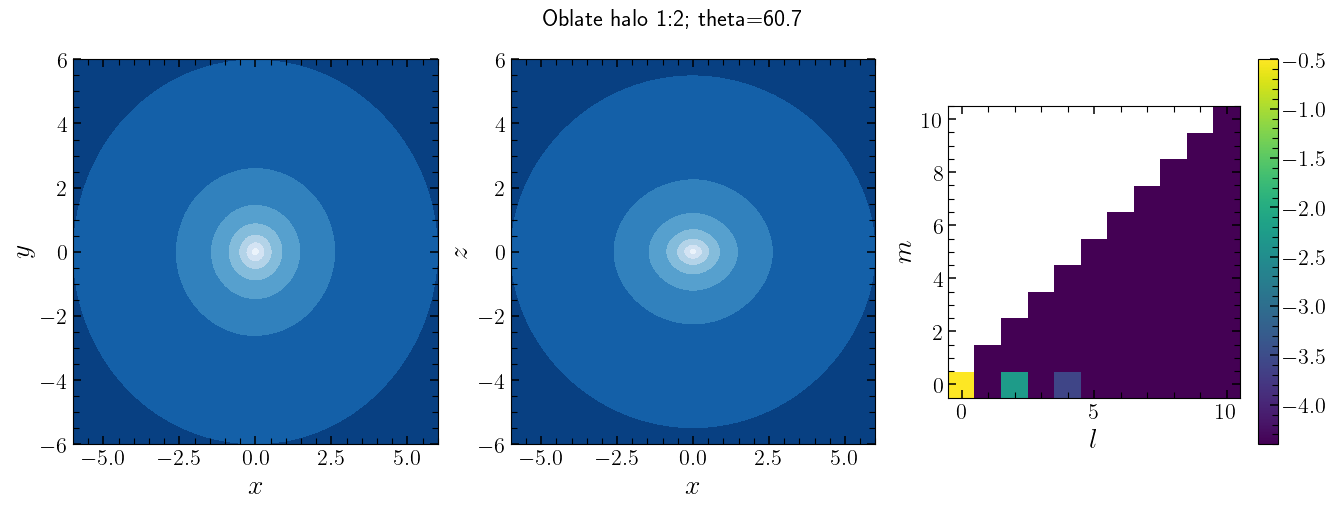

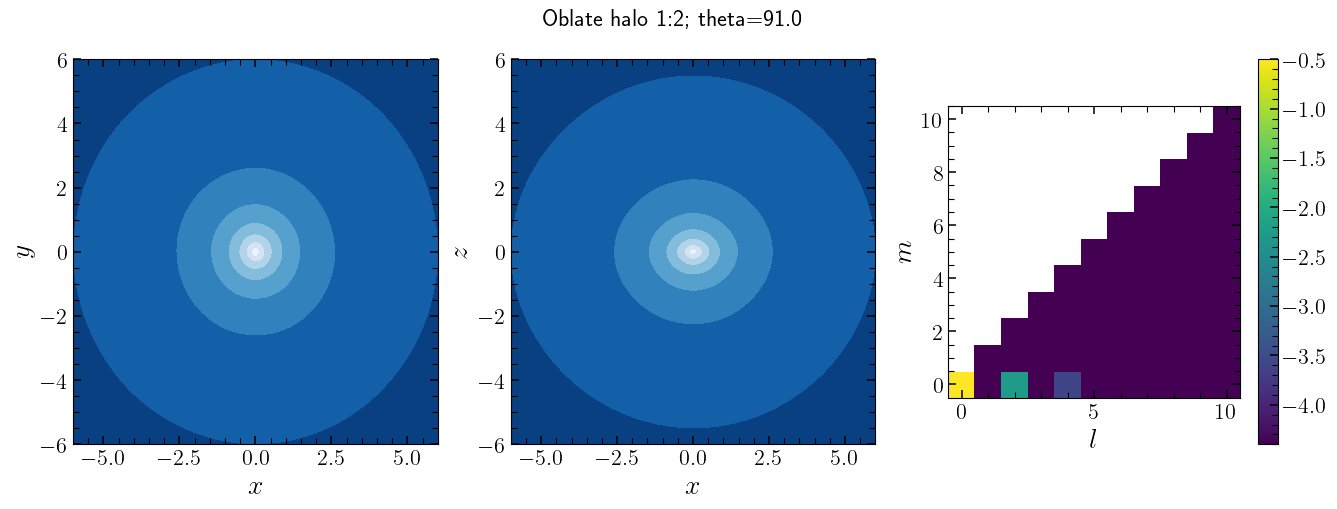

In [137]:
npart = 100000
a = 1
b = 1
c = 2
theta= np.linspace(0, 91, 4)
for t in range(len(theta)):
    U_obl, coeff_halo = compute_triax_halo_coeff(npart, a, b, 2, theta=theta[t], nmax=10, lmax=10)
    halo_pot = gp.scf.SCFPotential(1, 1, coeff_halo[0], coeff_halo[1])
    make_shape_coeff_plot(halo_pot, U_obl, r'Oblate halo 1:2; theta={:.1f}'.format(theta[t]))

In [ ]:
# Non axi-simmetry

In [141]:
import bfe

In [ ]:
bfe.

In [139]:
density?

Docstring:
density(xyz, Snlm, Tnlm, M=1, r_s=1)

Compute the density of the basis function expansion
at a set of positions given the expansion coefficients.

Parameters
----------
xyz : `~numpy.ndarray`
    A 2D array of positions where ``axis=0`` are multiple positions
    and ``axis=1`` are the coordinate dimensions (x, y, z).
Snlm : `~numpy.ndarray`
    A 3D array of expansion coefficients for the cosine terms
    of the expansion. This notation follows Lowing et al. (2011).
    The array should have shape ``(nmax+1, lmax+1, lmax+1)`` and any
    invalid terms (e.g., when m > l) will be ignored.
Tnlm : `~numpy.ndarray`
    A 3D array of expansion coefficients for the sine terms
    of the expansion. This notation follows Lowing et al. (2011).
    The array should have shape ``(nmax+1, lmax+1, lmax+1)`` and any
    invalid terms (e.g., when m > l) will be ignored.
M : numeric (optional)
    Mass scale. Leave unset for dimensionless units.
r_s : numeric (optional)
    Length scale. Le

In [94]:
np.sum(U_prol[:,0,0])

0.2862095261784963

In [95]:
np.sum(U_prol[:,2,2])

0.00035444742995546216

#### T = (a**2 - b**2) / (a**2 - c**2)
print(T)